PROJETO DE MACHINE LEARNING, ABAIXO FORAM INSERIDOS ALGUNS PACOTES QUE SERÃO UTILIZADOS E SUAS RESPECTIVAS LEGENDAS

In [1]:

#linguagem utilizada para obter a versão phyton utilizada
from platform import python_version

#pacotes para ML
    #criar objeto de regressão linear
from sklearn.linear_model import LinearRegression

    #calcular o erro quadrático médio entre as previsões do modelo e os valores reais.
from sklearn.metrics import mean_squared_error

    #O KFold é usado para dividir os dados em conjuntos de treinamento e validação
    #O cross_val_score é usado para calcular a pontuação de validação cruzada para o modelo.
from sklearn.model_selection import KFold, cross_val_score

    #Este pacote é usado para realizar previsões com validação cruzada. 
    #Ele retorna as previsões do modelo para cada amostra nos dados de entrada.
from sklearn.model_selection import cross_val_predict

    #Este pacote é usado para dividir os dados em conjuntos de treinamento e teste.
from sklearn.model_selection import train_test_split

    #Esta função é usada para calcular o coeficiente de determinação (R²) entre as previsões do modelo e os valores reais.
from sklearn.metrics import r2_score
    
    #Este pacote é usado para padronizar as features, escalando-as para ter média zero e desvio padrão igual a um.
from sklearn.preprocessing import StandardScaler

    #calcular o erro quadrático médio entre as previsões do modelo e os valores reais. 
from sklearn.metrics import mean_squared_error

#pacotes para SVM, Este pacote contém implementações de modelos de regressão de vetor de suporte (SVM). 
#No código fornecido, é importada a classe SVR para criar um objeto de modelo SVM.
from sklearn.svm import SVR
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

#pacotes para ensemble
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.inspection import permutation_importance

#pacotes para gráficos

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy as sp

#computação cientifica e tabelas
import numpy as np
import pandas as pd

%matplotlib inline
print(python_version())

3.9.13


In [2]:
pip list

Package                       Version
----------------------------- --------------------
alabaster                     0.7.12
anaconda-client               1.11.0
anaconda-navigator            2.3.1
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.11.7
astropy                       5.1
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
binaryornot                   0.4.4
bitarray                      2.5.1
bkcharts                      0.2
blac

In [3]:
from sklearn.feature_selection import SelectKBest, chi2, f_regression

In [4]:
pwd

'C:\\Users\\ARTHUR'

ABAIXO FAZER A LEITURA DO DATA SET LOCALIZADO NA PASTA NO DIRETÓRIO DO CÓDIGO EXECUTADO

In [5]:
dados = pd.read_excel('dataset.xlsx')

In [6]:
#Análise Exploratória
dados

,Cement,BlastfurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Ageoftesting,Concretecompressivestrength
0,336.0,0.0,0.0,182.0,3.000,986.00,817.00,28,44.864203
1,140.1,4.2,215.9,193.9,4.700,1049.50,710.10,28,26.420000
2,350.0,0.0,0.0,203.0,0.000,974.00,775.00,14,22.532076
3,162.0,148.0,190.0,179.0,19.000,838.00,741.00,28,42.080000
4,225.0,0.0,0.0,181.0,0.000,1113.00,833.00,7,11.169511
...,...,...,...,...,...,...,...,...,...
1229,4.5,0.4,0.5,1.8,0.036,12.35,8.85,7,20.300000
1230,4.5,0.4,0.5,1.8,0.036,12.35,8.85,7,23.400000
1231,4.5,0.4,0.5,1.8,0.036,12.35,8.85,28,30.500000
1232,4.5,0.4,0.5,1.8,0.036,12.35,8.85,28,29.500000


In [7]:
print(dados.dtypes)

Cement                         float64
BlastfurnaceSlag               float64
FlyAsh                         float64
Water                          float64
Superplasticizer               float64
CoarseAggregate                float64
FineAggregate                  float64
Ageoftesting                     int64
Concretecompressivestrength    float64
dtype: object


Histogramas são úteis para resumir e visualizar as características essenciais de um conjunto de dados

<AxesSubplot:>

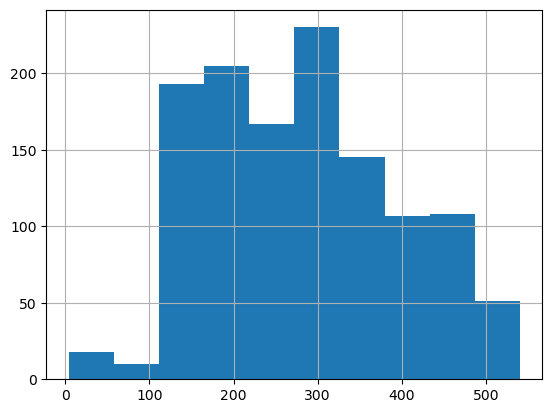

In [8]:
dados["Cement"].hist()

   Cement  BlastfurnaceSlag  FlyAsh  Water  Superplasticizer  CoarseAggregate  \
0   336.0               0.0     0.0  182.0               3.0            986.0   
1   140.1               4.2   215.9  193.9               4.7           1049.5   
2   350.0               0.0     0.0  203.0               0.0            974.0   
3   162.0             148.0   190.0  179.0              19.0            838.0   
4   225.0               0.0     0.0  181.0               0.0           1113.0   

   FineAggregate  Ageoftesting  Concretecompressivestrength  
0          817.0            28                    44.864203  
1          710.1            28                    26.420000  
2          775.0            14                    22.532076  
3          741.0            28                    42.080000  
4          833.0             7                    11.169511  
count    1234.000000
mean      282.372123
std       113.006877
min         4.500000
25%       190.340000
50%       277.000000
75%       361.7

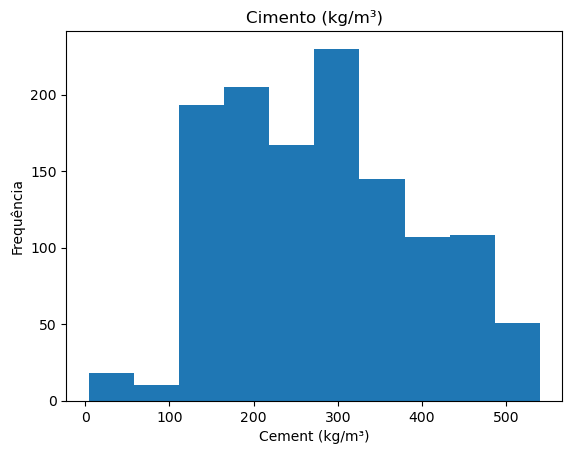

<Figure size 640x480 with 0 Axes>

In [9]:
# Verificar se os dados foram carregados corretamente e se a coluna "Cement" existe
print(dados.head())
print(dados["Cement"].describe())

# Criar o histograma
plt.hist(dados["Cement"], bins=10)

# Adicionar rótulos e título
plt.xlabel("Cement (kg/m³)")  # Adicionando a unidade "kg/m³" ao rótulo do eixo x
plt.ylabel("Frequência")
plt.title("Cimento (kg/m³)")

# Exibir o histograma
plt.show()

# Salvar o histograma em um arquivo de imagem (por exemplo, PNG)
plt.savefig("histograma_cement.png")




<AxesSubplot:>

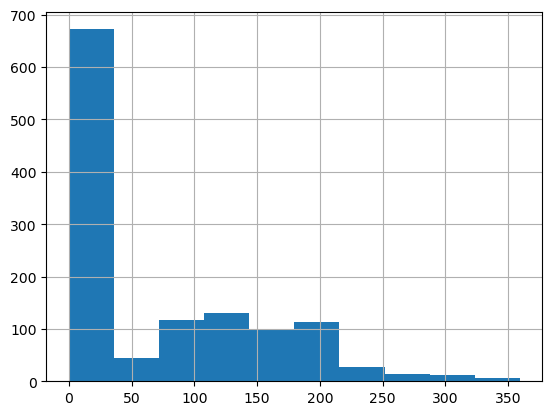

In [10]:
dados["BlastfurnaceSlag"].hist()

   Cement  BlastfurnaceSlag  FlyAsh  Water  Superplasticizer  CoarseAggregate  \
0   336.0               0.0     0.0  182.0               3.0            986.0   
1   140.1               4.2   215.9  193.9               4.7           1049.5   
2   350.0               0.0     0.0  203.0               0.0            974.0   
3   162.0             148.0   190.0  179.0              19.0            838.0   
4   225.0               0.0     0.0  181.0               0.0           1113.0   

   FineAggregate  Ageoftesting  Concretecompressivestrength  
0          817.0            28                    44.864203  
1          710.1            28                    26.420000  
2          775.0            14                    22.532076  
3          741.0            28                    42.080000  
4          833.0             7                    11.169511  
count    1234.000000
mean       68.921515
std        83.981351
min         0.000000
25%         0.000000
50%        17.350000
75%       132.9

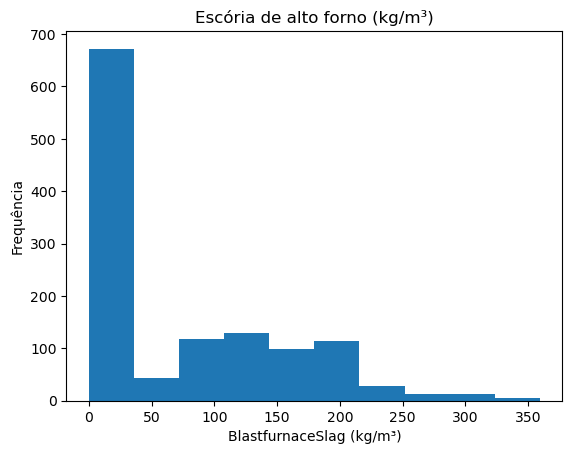

<Figure size 640x480 with 0 Axes>

In [11]:
# Verificar se os dados foram carregados corretamente e se a coluna "BlastfurnaceSlag" existe
print(dados.head())
print(dados["BlastfurnaceSlag"].describe())

# Criar o histograma
plt.hist(dados["BlastfurnaceSlag"], bins=10)

# Adicionar rótulos e título
plt.xlabel("BlastfurnaceSlag (kg/m³)")  # Adicionando a unidade "kg/m³" ao rótulo do eixo x
plt.ylabel("Frequência")
plt.title("Escória de alto forno (kg/m³)")

# Exibir o histograma
plt.show()

# Salvar o histograma em um arquivo de imagem (por exemplo, PNG)
plt.savefig("histograma_blastfurnace_slag.png")


<AxesSubplot:>

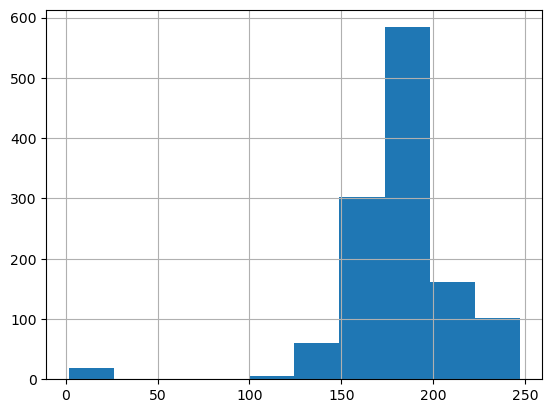

In [12]:
dados["Water"].hist()

   Cement  BlastfurnaceSlag  FlyAsh  Water  Superplasticizer  CoarseAggregate  \
0   336.0               0.0     0.0  182.0               3.0            986.0   
1   140.1               4.2   215.9  193.9               4.7           1049.5   
2   350.0               0.0     0.0  203.0               0.0            974.0   
3   162.0             148.0   190.0  179.0              19.0            838.0   
4   225.0               0.0     0.0  181.0               0.0           1113.0   

   FineAggregate  Ageoftesting  Concretecompressivestrength  
0          817.0            28                    44.864203  
1          710.1            28                    26.420000  
2          775.0            14                    22.532076  
3          741.0            28                    42.080000  
4          833.0             7                    11.169511  
count    1234.000000
mean       58.946232
std        71.101626
min         0.000000
25%         0.000000
50%         0.000000
75%       121.3

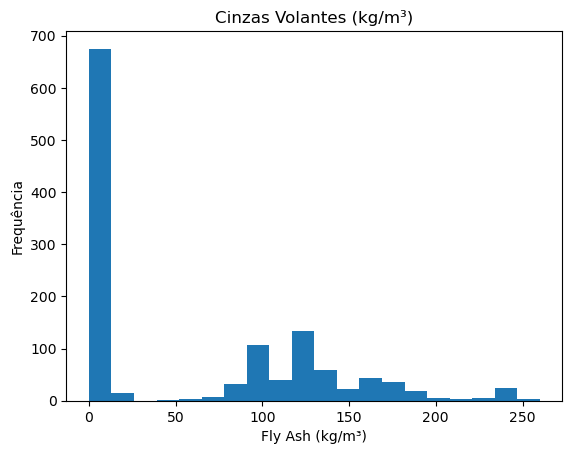

<Figure size 640x480 with 0 Axes>

In [13]:
# Verificar se os dados foram carregados corretamente e se a coluna "Fly Ash" existe
print(dados.head())
print(dados["FlyAsh"].describe())

# Criar o histograma
plt.hist(dados["FlyAsh"], bins=20)

# Adicionar rótulos e título
plt.xlabel("Fly Ash (kg/m³)")  # Adicionando a unidade "kg/m³" ao rótulo do eixo x
plt.ylabel("Frequência")
plt.title("Cinzas Volantes (kg/m³)")

# Exibir o histograma
plt.show()

# Salvar o histograma em um arquivo de imagem (por exemplo, PNG)
plt.savefig("histograma_flyash.png")

   Cement  BlastfurnaceSlag  FlyAsh  Water  Superplasticizer  CoarseAggregate  \
0   336.0               0.0     0.0  182.0               3.0            986.0   
1   140.1               4.2   215.9  193.9               4.7           1049.5   
2   350.0               0.0     0.0  203.0               0.0            974.0   
3   162.0             148.0   190.0  179.0              19.0            838.0   
4   225.0               0.0     0.0  181.0               0.0           1113.0   

   FineAggregate  Ageoftesting  Concretecompressivestrength  
0          817.0            28                    44.864203  
1          710.1            28                    26.420000  
2          775.0            14                    22.532076  
3          741.0            28                    42.080000  
4          833.0             7                    11.169511  
count    1234.000000
mean      181.438959
std        31.049011
min         1.800000
25%       167.350000
50%       185.700000
75%       194.0

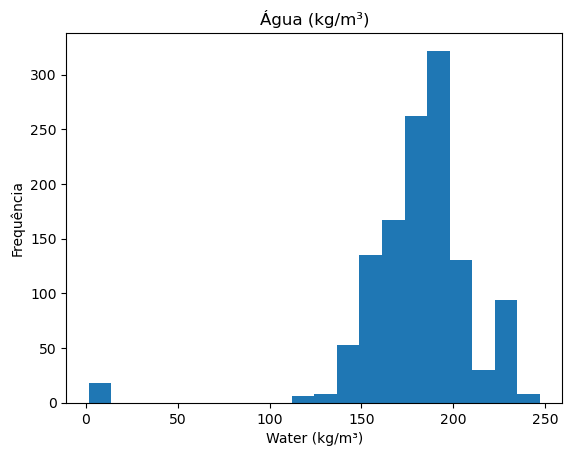

<Figure size 640x480 with 0 Axes>

In [14]:
# Verificar se os dados foram carregados corretamente e se a coluna "Water" existe
print(dados.head())
print(dados["Water"].describe())

# Criar o histograma
plt.hist(dados["Water"], bins=20)

# Adicionar rótulos e título
plt.xlabel("Water (kg/m³)")  # Adicionando a unidade "kg/m³" ao rótulo do eixo x
plt.ylabel("Frequência")
plt.title("Água (kg/m³)")

# Exibir o histograma
plt.show()

# Salvar o histograma em um arquivo de imagem (por exemplo, PNG)
plt.savefig("histograma_water.png")


<AxesSubplot:>

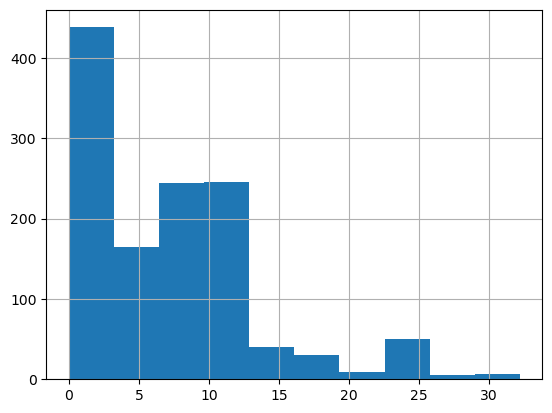

In [15]:
dados["Superplasticizer"].hist()

   Cement  BlastfurnaceSlag  FlyAsh  Water  Superplasticizer  CoarseAggregate  \
0   336.0               0.0     0.0  182.0               3.0            986.0   
1   140.1               4.2   215.9  193.9               4.7           1049.5   
2   350.0               0.0     0.0  203.0               0.0            974.0   
3   162.0             148.0   190.0  179.0              19.0            838.0   
4   225.0               0.0     0.0  181.0               0.0           1113.0   

   FineAggregate  Ageoftesting  Concretecompressivestrength  
0          817.0            28                    44.864203  
1          710.1            28                    26.420000  
2          775.0            14                    22.532076  
3          741.0            28                    42.080000  
4          833.0             7                    11.169511  
count    1234.000000
mean        6.866884
std         6.616181
min         0.000000
25%         0.000000
50%         6.675000
75%        10.6

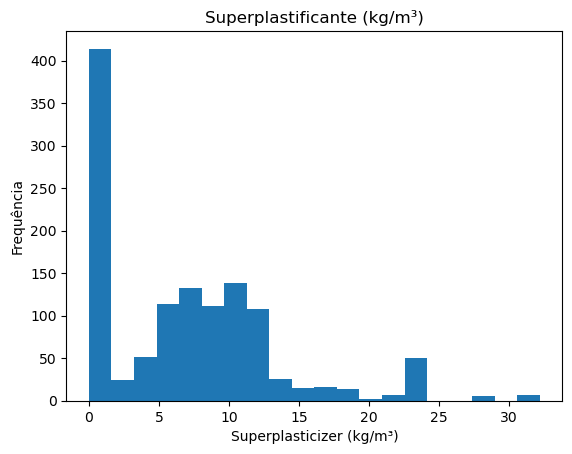

<Figure size 640x480 with 0 Axes>

In [16]:
# Verificar se os dados foram carregados corretamente e se a coluna "Superplasticizer" existe
print(dados.head())
print(dados["Superplasticizer"].describe())

# Criar o histograma
plt.hist(dados["Superplasticizer"], bins=20)

# Adicionar rótulos e título
plt.xlabel("Superplasticizer (kg/m³)")  # Adicionando a unidade "kg/m³" ao rótulo do eixo x
plt.ylabel("Frequência")
plt.title("Superplastificante (kg/m³)")

# Exibir o histograma
plt.show()

# Salvar o histograma em um arquivo de imagem (por exemplo, PNG)
plt.savefig("histograma_superplasticizer.png")


<AxesSubplot:>

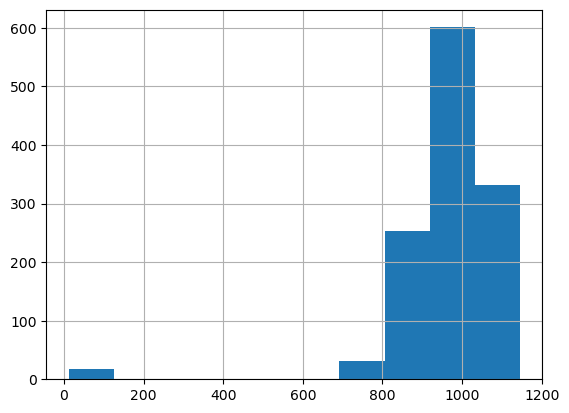

In [17]:
dados["CoarseAggregate"].hist()

   Cement  BlastfurnaceSlag  FlyAsh  Water  Superplasticizer  CoarseAggregate  \
0   336.0               0.0     0.0  182.0               3.0            986.0   
1   140.1               4.2   215.9  193.9               4.7           1049.5   
2   350.0               0.0     0.0  203.0               0.0            974.0   
3   162.0             148.0   190.0  179.0              19.0            838.0   
4   225.0               0.0     0.0  181.0               0.0           1113.0   

   FineAggregate  Ageoftesting  Concretecompressivestrength  
0          817.0            28                    44.864203  
1          710.1            28                    26.420000  
2          775.0            14                    22.532076  
3          741.0            28                    42.080000  
4          833.0             7                    11.169511  
count    1234.000000
mean      958.783266
std       143.580765
min        12.350000
25%       923.000000
50%       968.000000
75%      1043.6

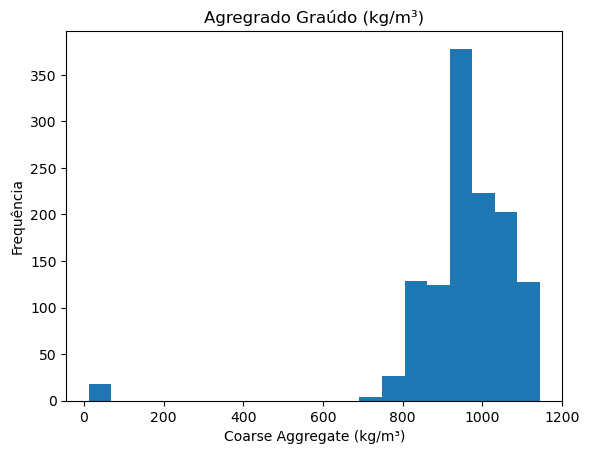

<Figure size 640x480 with 0 Axes>

In [18]:
# Verificar se os dados foram carregados corretamente e se a coluna "CoarseAggregate" existe
print(dados.head())
print(dados["CoarseAggregate"].describe())

# Criar o histograma
plt.hist(dados["CoarseAggregate"], bins=20)

# Adicionar rótulos e título
plt.xlabel("Coarse Aggregate (kg/m³)")  # Adicionando a unidade "kg/m³" ao rótulo do eixo x
plt.ylabel("Frequência")
plt.title("Agregrado Graúdo (kg/m³)")

# Exibir o histograma
plt.show()

# Salvar o histograma em um arquivo de imagem (por exemplo, PNG)
plt.savefig("histograma_coarseaggregate.png")


<AxesSubplot:>

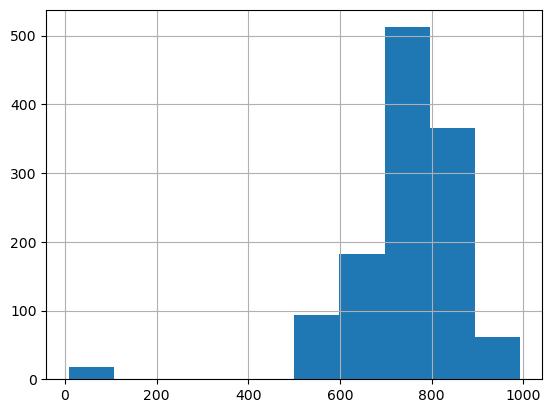

In [19]:
dados["FineAggregate"].hist()

   Cement  BlastfurnaceSlag  FlyAsh  Water  Superplasticizer  CoarseAggregate  \
0   336.0               0.0     0.0  182.0               3.0            986.0   
1   140.1               4.2   215.9  193.9               4.7           1049.5   
2   350.0               0.0     0.0  203.0               0.0            974.0   
3   162.0             148.0   190.0  179.0              19.0            838.0   
4   225.0               0.0     0.0  181.0               0.0           1113.0   

   FineAggregate  Ageoftesting  Concretecompressivestrength  
0          817.0            28                    44.864203  
1          710.1            28                    26.420000  
2          775.0            14                    22.532076  
3          741.0            28                    42.080000  
4          833.0             7                    11.169511  
count    1234.000000
mean      750.272650
std       125.208056
min         8.850000
25%       703.250000
50%       770.000000
75%       812.0

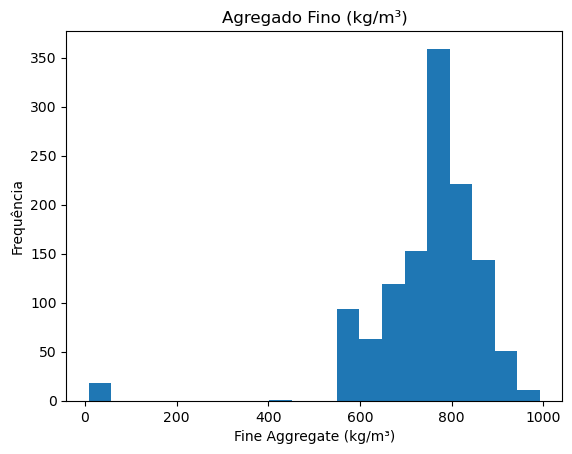

<Figure size 640x480 with 0 Axes>

In [20]:
# Verificar se os dados foram carregados corretamente e se a coluna "FineAggregate" existe
print(dados.head())
print(dados["FineAggregate"].describe())

# Criar o histograma
plt.hist(dados["FineAggregate"], bins=20)

# Adicionar rótulos e título
plt.xlabel("Fine Aggregate (kg/m³)")  # Adicionando a unidade "kg/m³" ao rótulo do eixo x
plt.ylabel("Frequência")
plt.title("Agregado Fino (kg/m³)")

# Exibir o histograma
plt.show()

# Salvar o histograma em um arquivo de imagem (por exemplo, PNG)
plt.savefig("histograma_fineaggregate.png")


<AxesSubplot:>

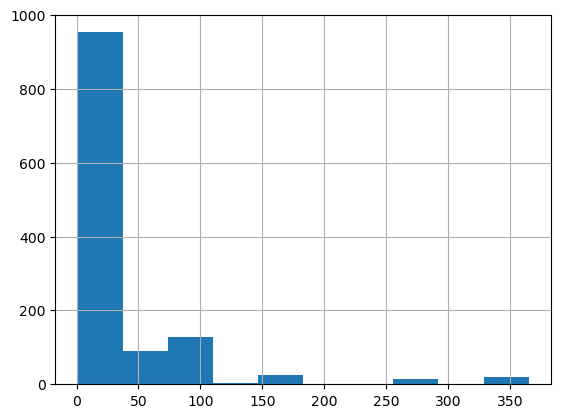

In [21]:
dados["Ageoftesting"].hist()

   Cement  BlastfurnaceSlag  FlyAsh  Water  Superplasticizer  CoarseAggregate  \
0   336.0               0.0     0.0  182.0               3.0            986.0   
1   140.1               4.2   215.9  193.9               4.7           1049.5   
2   350.0               0.0     0.0  203.0               0.0            974.0   
3   162.0             148.0   190.0  179.0              19.0            838.0   
4   225.0               0.0     0.0  181.0               0.0           1113.0   

   FineAggregate  Ageoftesting  Concretecompressivestrength  
0          817.0            28                    44.864203  
1          710.1            28                    26.420000  
2          775.0            14                    22.532076  
3          741.0            28                    42.080000  
4          833.0             7                    11.169511  
count    1234.000000
mean       41.900324
std        58.426660
min         1.000000
25%        14.000000
50%        28.000000
75%        28.0

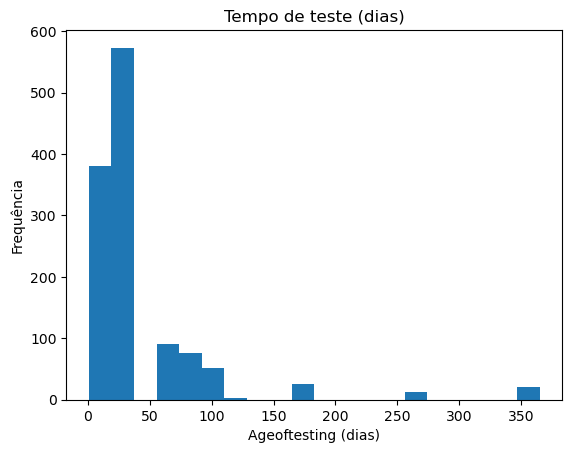

<Figure size 640x480 with 0 Axes>

In [22]:
# Verificar se os dados foram carregados corretamente e se a coluna "Ageoftesting" existe
print(dados.head())
print(dados["Ageoftesting"].describe())

# Criar o histograma
plt.hist(dados["Ageoftesting"], bins=20)

# Adicionar rótulos e título
plt.xlabel("Ageoftesting (dias)")  # Adicionando a unidade "dias" ao rótulo do eixo x
plt.ylabel("Frequência")
plt.title("Tempo de teste (dias)")

# Exibir o histograma
plt.show()

# Salvar o histograma em um arquivo de imagem (por exemplo, PNG)
plt.savefig("histograma_ageoftesting.png")


<AxesSubplot:>

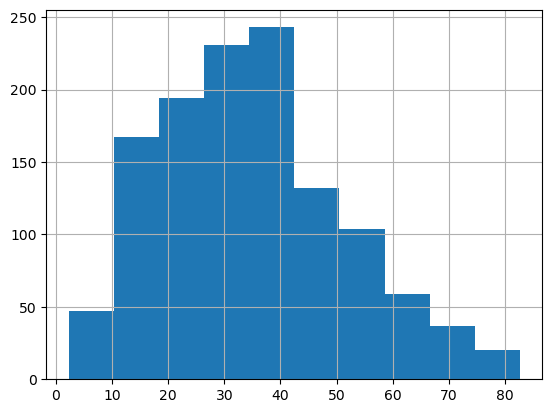

In [23]:
dados["Concretecompressivestrength"].hist()

   Cement  BlastfurnaceSlag  FlyAsh  Water  Superplasticizer  CoarseAggregate  \
0   336.0               0.0     0.0  182.0               3.0            986.0   
1   140.1               4.2   215.9  193.9               4.7           1049.5   
2   350.0               0.0     0.0  203.0               0.0            974.0   
3   162.0             148.0   190.0  179.0              19.0            838.0   
4   225.0               0.0     0.0  181.0               0.0           1113.0   

   FineAggregate  Ageoftesting  Concretecompressivestrength  
0          817.0            28                    44.864203  
1          710.1            28                    26.420000  
2          775.0            14                    22.532076  
3          741.0            28                    42.080000  
4          833.0             7                    11.169511  
count    1234.000000
mean       35.104506
std        16.196086
min         2.331808
25%        23.092275
50%        33.701587
75%        44.3

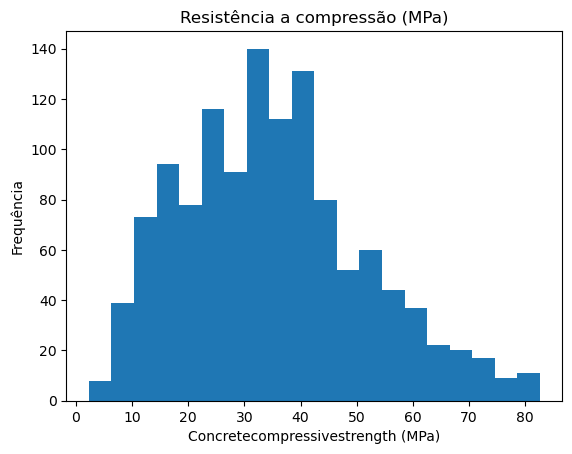

<Figure size 640x480 with 0 Axes>

In [24]:
# Verificar se os dados foram carregados corretamente e se a coluna "Concretecompressivestrength" existe
print(dados.head())
print(dados["Concretecompressivestrength"].describe())

# Criar o histograma
plt.hist(dados["Concretecompressivestrength"], bins=20)

# Adicionar rótulos e título
plt.xlabel("Concretecompressivestrength (MPa)")  # Adicionando a unidade "MPa" ao rótulo do eixo x
plt.ylabel("Frequência")
plt.title("Resistência a compressão (MPa)")

# Exibir o histograma
plt.show()

# Salvar o histograma em um arquivo de imagem (por exemplo, PNG)
plt.savefig("histograma_concretecompressivestrength.png")


VISUALIZAÇÃO DOS DADOS

In [25]:
# Quais dados estou trabalhando
dados.head()

,Cement,BlastfurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Ageoftesting,Concretecompressivestrength
0,336.0,0.0,0.0,182.0,3.0,986.0,817.0,28,44.864203
1,140.1,4.2,215.9,193.9,4.7,1049.5,710.1,28,26.420000
2,350.0,0.0,0.0,203.0,0.0,974.0,775.0,14,22.532076
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,28,42.080000
4,225.0,0.0,0.0,181.0,0.0,1113.0,833.0,7,11.169511


In [26]:
#Informações sobre colunas e valores não nulos

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Cement                       1234 non-null   float64
 1   BlastfurnaceSlag             1234 non-null   float64
 2   FlyAsh                       1234 non-null   float64
 3   Water                        1234 non-null   float64
 4   Superplasticizer             1234 non-null   float64
 5   CoarseAggregate              1234 non-null   float64
 6   FineAggregate                1234 non-null   float64
 7   Ageoftesting                 1234 non-null   int64  
 8   Concretecompressivestrength  1234 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 86.9 KB


In [27]:
# Resumo estatístico do dataset 

dados.describe()

,Cement,BlastfurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Ageoftesting,Concretecompressivestrength
count,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000
mean,282.372123,68.921515,58.946232,181.438959,6.866884,958.783266,750.272650,41.900324,35.104506
std,113.006877,83.981351,71.101626,31.049011,6.616181,143.580765,125.208056,58.426660,16.196086
min,4.500000,0.000000,0.000000,1.800000,0.000000,12.350000,8.850000,1.000000,2.331808
25%,190.340000,0.000000,0.000000,167.350000,0.000000,923.000000,703.250000,14.000000,23.092275
50%,277.000000,17.350000,0.000000,185.700000,6.675000,968.000000,770.000000,28.000000,33.701587
75%,361.700000,132.900000,121.350000,194.000000,10.675000,1043.600000,812.000000,28.000000,44.393636
max,540.000000,359.400000,260.000000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [28]:
import pandas as pd

# Já possuo o DataFrame 'dados' com os dados originais

# Resumo estatístico do dataset
resumo_estatistico = dados.describe()

# Caminho e nome do arquivo Excel de destino
arquivo_excel = 'resumo_estatistico.xlsx'

# Exportar o DataFrame para o arquivo Excel
resumo_estatistico.to_excel(arquivo_excel, index=False)


In [29]:
# Verificar valores ausentes em todo o conjunto de dados por precaução

dados.isnull().sum()

Cement                         0
BlastfurnaceSlag               0
FlyAsh                         0
Water                          0
Superplasticizer               0
CoarseAggregate                0
FineAggregate                  0
Ageoftesting                   0
Concretecompressivestrength    0
dtype: int64

In [30]:
#correlação entre variáveis
# Criando um Correlation Plot

def visualize_correlation_matrix(data, hurdle = 0.0):
    R = np.corrcoef(data, rowvar = 0)
    R = (R + 1) / 2  # Aplicando a transformação
    R[np.where(np.abs(R) < hurdle)] = 0.0
    heatmap = plt.pcolor(R, cmap = mpl.cm.coolwarm, alpha = 0.8)
    heatmap.axes.set_frame_on(False)
    heatmap.axes.set_yticks(np.arange(R.shape[0]) + 0.5, minor = False)
    heatmap.axes.set_xticks(np.arange(R.shape[1]) + 0.5, minor = False)
    heatmap.axes.set_xticklabels(variables, minor = False)
    plt.xticks(rotation=90)
    heatmap.axes.set_yticklabels(variables, minor = False)
    plt.tick_params(axis = 'both', which = 'both', bottom = 'off', top = 'off', left = 'off', right = 'off') 
    plt.colorbar()
    plt.show()


In [31]:
# Calcula a matriz de correlação
matriz_corr = dados.corr()

# Aplica a transformação para o intervalo de 0 a 1
matriz_corr = (matriz_corr + 1) / 2
print (matriz_corr)

                               Cement  BlastfurnaceSlag    FlyAsh     Water  \
Cement                       1.000000          0.371794  0.305865  0.613409   
BlastfurnaceSlag             0.371794          1.000000  0.391847  0.557317   
FlyAsh                       0.305865          0.391847  1.000000  0.472195   
Water                        0.613409          0.557317  0.472195  1.000000   
Superplasticizer             0.615018          0.506654  0.619459  0.402815   
CoarseAggregate              0.643809          0.450025  0.493979  0.752394   
FineAggregate                0.508846          0.491661  0.559947  0.646764   
Ageoftesting                 0.527928          0.492096  0.434523  0.590098   
Concretecompressivestrength  0.676119          0.580625  0.502469  0.405677   

                             Superplasticizer  CoarseAggregate  FineAggregate  \
Cement                               0.615018         0.643809       0.508846   
BlastfurnaceSlag                     0.506654  

In [32]:
print(dados.columns)


Index(['Cement', 'BlastfurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer',
       'CoarseAggregate', 'FineAggregate', 'Ageoftesting',
       'Concretecompressivestrength'],
      dtype='object')


VISUALIZAR MAPA DE CALOR DAS CORRELAÇÕES


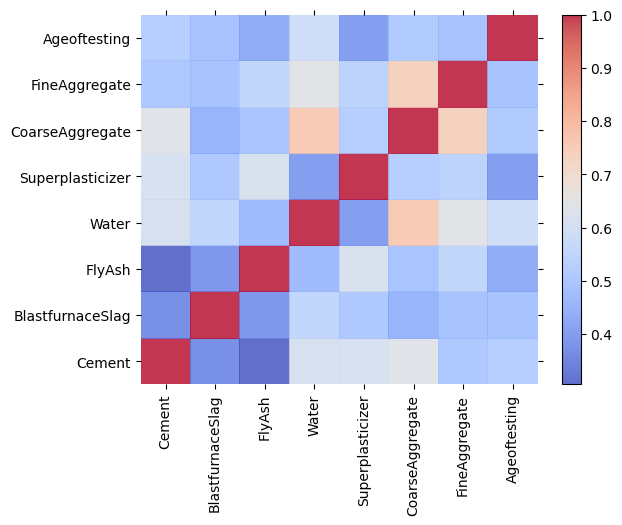

In [33]:
variables = ['Cement', 'BlastfurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer', 'CoarseAggregate', 'FineAggregate', 'Ageoftesting']

visualize_correlation_matrix(dados[variables])


Verificou-se uma correlação positiva moderada entre a resistência à compressão do concreto e a quantidade de cimento utilizada na mistura (coeficiente de correlação de 0.35). Além disso, notou-se uma relação negativa moderada entre a resistência do concreto e o teor de água na mistura (coeficiente de correlação de -0.19).

Outra descoberta interessante foi a correlação positiva moderada entre a resistência à compressão e a idade do concreto no momento do teste (coeficiente de correlação de 0.33). Isso sugere que, à medida que o concreto envelhece, sua resistência tende a aumentar.

Por outro lado, as correlações entre a resistência do concreto e outros materiais, como escória de alto-forno, cinzas volantes e superplastificante, foram mais fracas, com coeficientes próximos de zero.

É importante ressaltar que os coeficientes de correlação fornecem informações sobre as relações lineares entre as variáveis, mas não capturam possíveis relações não lineares ou dependências causais. Portanto, outras análises, como regressão não linear e técnicas de aprendizado de máquina, podem ser úteis para explorar relações mais complexas entre as variáveis e melhorar a previsão da resistência do concreto.

In [34]:
dados.head()

,Cement,BlastfurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Ageoftesting,Concretecompressivestrength
0,336.0,0.0,0.0,182.0,3.0,986.0,817.0,28,44.864203
1,140.1,4.2,215.9,193.9,4.7,1049.5,710.1,28,26.420000
2,350.0,0.0,0.0,203.0,0.0,974.0,775.0,14,22.532076
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,28,42.080000
4,225.0,0.0,0.0,181.0,0.0,1113.0,833.0,7,11.169511


In [35]:
y = dados['Concretecompressivestrength']

In [36]:
X = dados[['Cement', 'BlastfurnaceSlag','FlyAsh', 'Water', 'Superplasticizer', 'CoarseAggregate','FineAggregate', 'Ageoftesting']]


In [37]:
X.head()

,Cement,BlastfurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Ageoftesting
0,336.0,0.0,0.0,182.0,3.0,986.0,817.0,28
1,140.1,4.2,215.9,193.9,4.7,1049.5,710.1,28
2,350.0,0.0,0.0,203.0,0.0,974.0,775.0,14
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,28
4,225.0,0.0,0.0,181.0,0.0,1113.0,833.0,7


In [38]:
#y = y.to_numpy()

VARIANDO VALOR PARA K=8

In [39]:
X_new = SelectKBest(f_regression, k=8).fit(X, y)

In [40]:
X_new.get_feature_names_out()

array(['Cement', 'BlastfurnaceSlag', 'FlyAsh', 'Water',
       'Superplasticizer', 'CoarseAggregate', 'FineAggregate',
       'Ageoftesting'], dtype=object)

In [41]:
X_new.scores_

array([1.74508315e+02, 3.28886828e+01, 3.00302826e-02, 4.54611820e+01,
       5.87560057e+01, 1.17472984e+01, 1.96930866e-02, 1.50512919e+02])

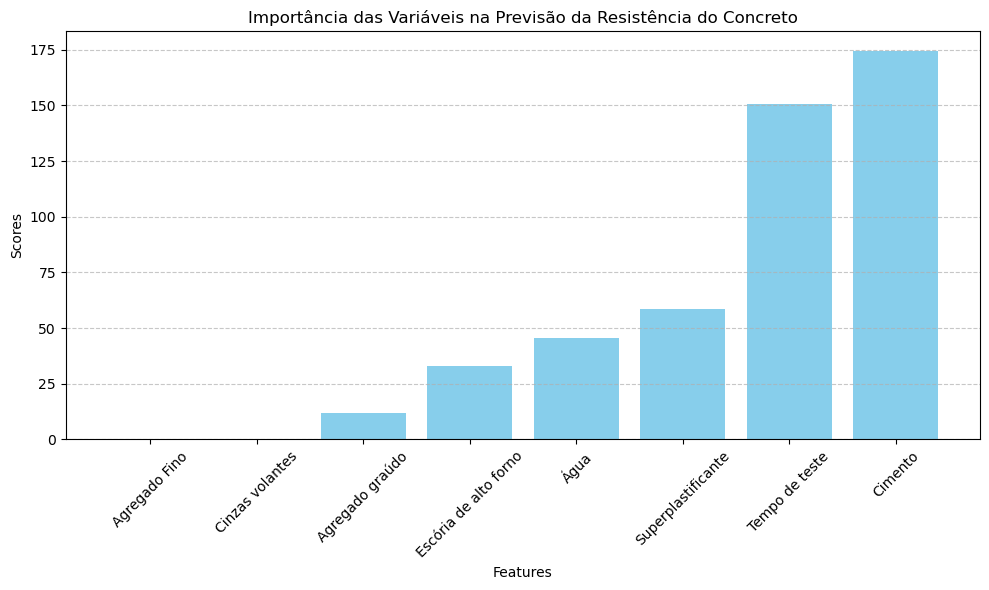

In [42]:
import matplotlib.pyplot as plt

# Scores das features
scores = [1.74508315e+02, 3.28886828e+01, 3.00302826e-02, 4.54611820e+01,
       5.87560057e+01, 1.17472984e+01, 1.96930866e-02, 1.50512919e+02]

# Nomes das features
features = ['Cimento', 'Escória de alto forno','Cinzas volantes', 'Água', 'Superplastificante', 'Agregado graúdo','Agregado Fino', 'Tempo de teste']

# Combinar as listas de features e scores em uma lista de tuplas
combined = list(zip(features, scores))

# Ordenar a lista de tuplas com base nos scores
combined.sort(key=lambda x: x[1])

# Dividir a lista ordenada de volta em duas listas
features, scores = zip(*combined)

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(features, scores, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Scores')
plt.title('Importância das Variáveis na Previsão da Resistência do Concreto')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar o gráfico
plt.show()


In [43]:
#Importe a classe StandardScaler do scikit-learn
from sklearn.preprocessing import StandardScaler

#Crie o objeto stdScaler
stdScaler = StandardScaler()

#Escalar os dados
#stdScaler = StandardScaler()
 
X = dados[['Cement', 'BlastfurnaceSlag','FlyAsh', 'Water', 'Superplasticizer', 'CoarseAggregate','FineAggregate', 'Ageoftesting']]
# transformada z = (x - u) /s
X1 = stdScaler.fit_transform(X) 
print(X1)

[[ 0.4747465  -0.82100916 -0.82937809 ...  0.18963382  0.53314783
  -0.2380071 ]
 [-1.25947915 -0.77097778  2.2083518  ...  0.63207292 -0.32097725
  -0.2380071 ]
 [ 0.59868299 -0.82100916 -0.82937809 ...  0.10602328  0.19757016
  -0.47772089]
 ...
 [-2.45989262 -0.81624426 -0.82234305 ... -6.59431634 -5.92392589
  -0.2380071 ]
 [-2.45989262 -0.81624426 -0.82234305 ... -6.59431634 -5.92392589
  -0.2380071 ]
 [-2.45989262 -0.81624426 -0.82234305 ... -6.59431634 -5.92392589
  -0.2380071 ]]


In [44]:
matriz_corr = X.corr()
print (matriz_corr)

                    Cement  BlastfurnaceSlag    FlyAsh     Water  \
Cement            1.000000         -0.256412 -0.388271  0.226817   
BlastfurnaceSlag -0.256412          1.000000 -0.216306  0.114635   
FlyAsh           -0.388271         -0.216306  1.000000 -0.055610   
Water             0.226817          0.114635 -0.055610  1.000000   
Superplasticizer  0.230035          0.013309  0.238918 -0.194369   
CoarseAggregate   0.287618         -0.099949 -0.012041  0.504789   
FineAggregate     0.017692         -0.016679  0.119894  0.293527   
Ageoftesting      0.055856         -0.015808 -0.130954  0.180197   

                  Superplasticizer  CoarseAggregate  FineAggregate  \
Cement                    0.230035         0.287618       0.017692   
BlastfurnaceSlag          0.013309        -0.099949      -0.016679   
FlyAsh                    0.238918        -0.012041       0.119894   
Water                    -0.194369         0.504789       0.293527   
Superplasticizer          1.000000   

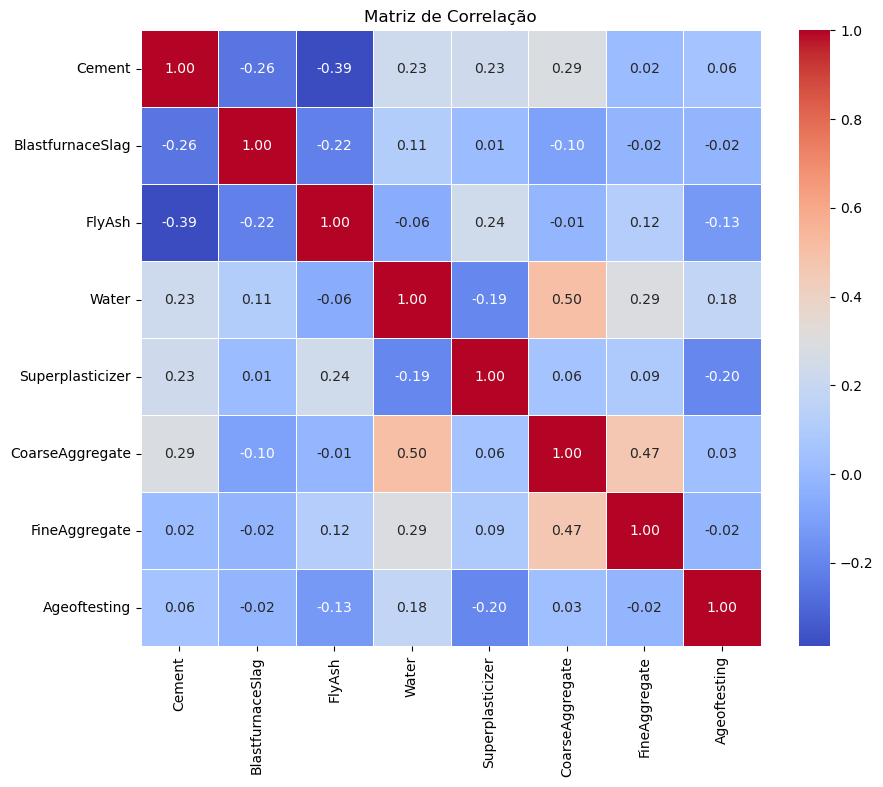

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dados com as colunas específicas
data = dados[['Cement', 'BlastfurnaceSlag','FlyAsh', 'Water', 'Superplasticizer', 'CoarseAggregate','FineAggregate', 'Ageoftesting']]

# Matriz de correlação
correlation_matrix = data.corr()

# Criar um gráfico de heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()



In [46]:
#criando um modelo simples
# x = x.fillna(-1)
lr = LinearRegression()
lr.fit(X, y)
print('training R2 = ' + str(round(lr.score(X, y), 3)))
print('training RMSE = %.3f' % np.sqrt(mean_squared_error(y_true=y, y_pred=lr.predict(X))))

training R2 = 0.594
training RMSE = 10.319


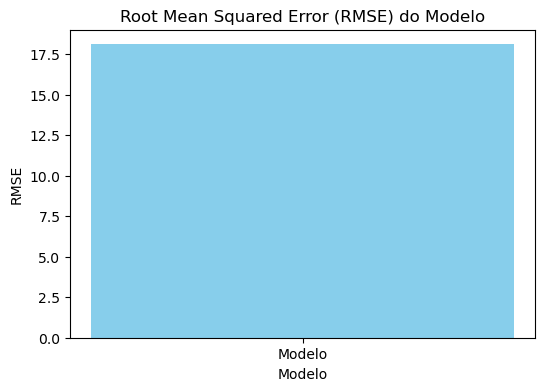

In [47]:
import matplotlib.pyplot as plt

# RMSE do modelo
rmse_value = 18.097

# Criar o gráfico de barras
plt.figure(figsize=(6, 4))
plt.bar(['Modelo'], [rmse_value], color='skyblue')
plt.xlabel('Modelo')
plt.ylabel('RMSE')
plt.title('Root Mean Squared Error (RMSE) do Modelo')
plt.show()


In [48]:
print(y)
y_pred = lr.predict(X)
print(y_pred)

0       44.864203
1       26.420000
2       22.532076
3       42.080000
4       11.169511
          ...    
1229    20.300000
1230    23.400000
1231    30.500000
1232    29.500000
1233    28.200000
Name: Concretecompressivestrength, Length: 1234, dtype: float64
[28.1828424  22.85201595 22.8495412  ... 32.95953842 32.95953842
 32.95953842]


<AxesSubplot:xlabel='Concretecompressivestrength', ylabel='Predicted'>

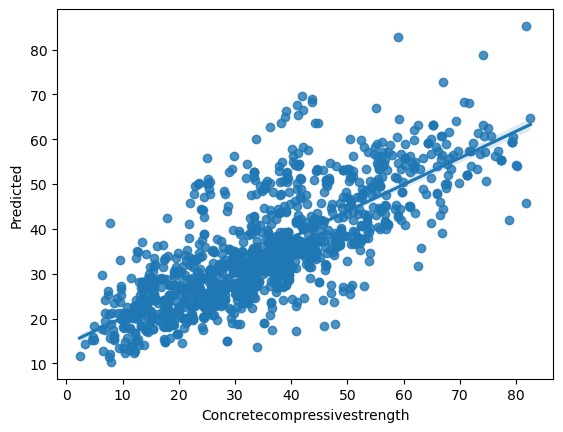

In [49]:
#visualização
# plot
df = pd.DataFrame()
df['Concretecompressivestrength'] = y
df['Predicted'] = y_pred
sns.regplot(x = 'Concretecompressivestrength', y = 'Predicted', data = df)



In [50]:
X.head()

,Cement,BlastfurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Ageoftesting
0,336.0,0.0,0.0,182.0,3.0,986.0,817.0,28
1,140.1,4.2,215.9,193.9,4.7,1049.5,710.1,28
2,350.0,0.0,0.0,203.0,0.0,974.0,775.0,14
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,28
4,225.0,0.0,0.0,181.0,0.0,1113.0,833.0,7


In [51]:
# Produz a matriz com os novos dados de entrada para a previsão
prev = pd.DataFrame({
    'Cement': [200],
    'BlastfurnaceSlag': [100],
    'FlyAsh': [40.0],
    'Water': [40.0],
    'Superplasticizer': [1],
    'CoarseAggregate': [2],
    'FineAggregate':[2],
    'Ageoftesting': [5]})



In [52]:
# Divisão em dados de treino e de teste
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.1, random_state = 42)

In [53]:
print(y_train)

56      38.190000
86      26.855090
649     17.836744
277     37.679863
109     29.231714
          ...    
1044    40.858348
1095    47.739318
1130    18.415904
860     62.052840
1126    48.794217
Name: Concretecompressivestrength, Length: 1110, dtype: float64


In [54]:
#FUNÇÃO PARA MOSTRAR O R2 NO GRÁFICO
def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['Concretecompressivestrength'], data['Predicted'])
    r = float(r) ** 2
    err = mean_squared_error(data['Concretecompressivestrength'], data['Predicted'], squared=True)
    ax = plt.gca()
    ax.text(.05, .8, 'r2={:.2f}, p={:.6f}, RMSE={:.4f}'.format(r, p, err),
            transform=ax.transAxes)

In [55]:
param = {'kernel' : ('poly', 'rbf', 'sigmoid'),
         'C' : [0.1, 0.5, 1, 5, 10],'degree' : [1, 5, 10],'coef0' : [0, 0.01, 0.1, 0.5, 1],
         'gamma' : [0.1, 0.5, 1, 5, 10],
         'max_iter': [1000]}
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

In [56]:
grid = GridSearchCV(SVR(), param_grid=param, cv=cv)

In [57]:
import time

In [58]:
start_time = time.time()
grid.fit(X_train, y_train)
end_time = time.time()

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_i

In [59]:
print("--- O treinamento durou %s segundos ---" % (end_time - start_time))

--- O treinamento durou 742.9486689567566 segundos ---


In [60]:
grid.best_estimator_

SVR(C=10, coef0=0, degree=1, gamma=0.5, max_iter=1000)

In [61]:
grid.best_score_

0.814835861498513

In [62]:
grid.best_estimator_

SVR(C=10, coef0=0, degree=1, gamma=0.5, max_iter=1000)

In [63]:
y_pred = pd.DataFrame()
y_pred["RBF"] = grid.predict(X_test)

In [64]:
y_pred.head()

,RBF
0,34.020433
1,33.885163
2,53.643931
3,44.142246
4,29.162037


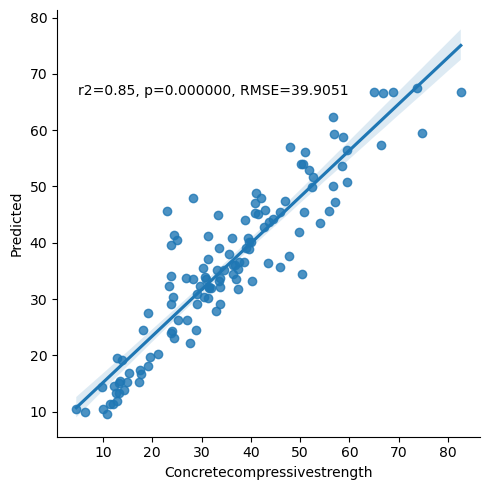

In [65]:
#visualização RBF
# plot
df = pd.DataFrame()
df['Concretecompressivestrength'] = y_test
df['Predicted'] = y_pred["RBF"].values

g = sns.lmplot(x = 'Concretecompressivestrength', y = 'Predicted', data = df, ci = 90)
g.map_dataframe(annotate)
plt.show()

GRADIENT BOOSTING É UM MÉTODO DE ARVORE DE DECISÃO
    

In [66]:
#Agora é hora do gradient Boosting
params_boosting = {
    "n_estimators": 1000,
    "max_depth": 5,
    "min_samples_split": 20,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

In [67]:
reg = GradientBoostingRegressor(**params_boosting)
reg.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=5, min_samples_split=20,
                          n_estimators=1000)

In [68]:
y_pred['GradientBoosting'] = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred['GradientBoosting'])
print("RMSE no teste: {:.4f}".format(mse))

RMSE no teste: 25.5979


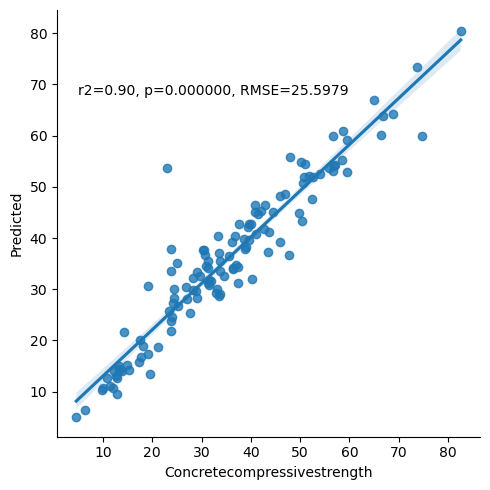

In [69]:
df['Predicted'] = y_pred["GradientBoosting"].values

g = sns.lmplot(x = 'Concretecompressivestrength', y = 'Predicted', data = df, ci = 90)
g.map_dataframe(annotate)
plt.show()



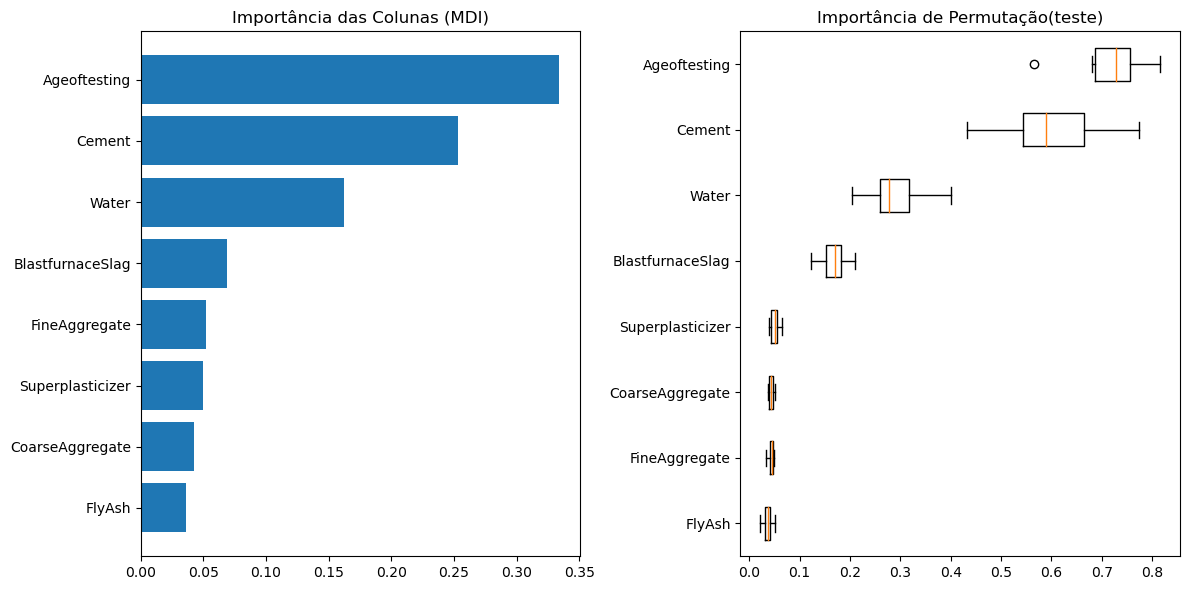

In [70]:
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X.columns.values.tolist())[sorted_idx])
plt.title("Importância das Colunas (MDI)")

result = permutation_importance(
    reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(X.columns.values.tolist())[sorted_idx],
)
plt.title("Importância de Permutação(teste)")
fig.tight_layout()
plt.show()

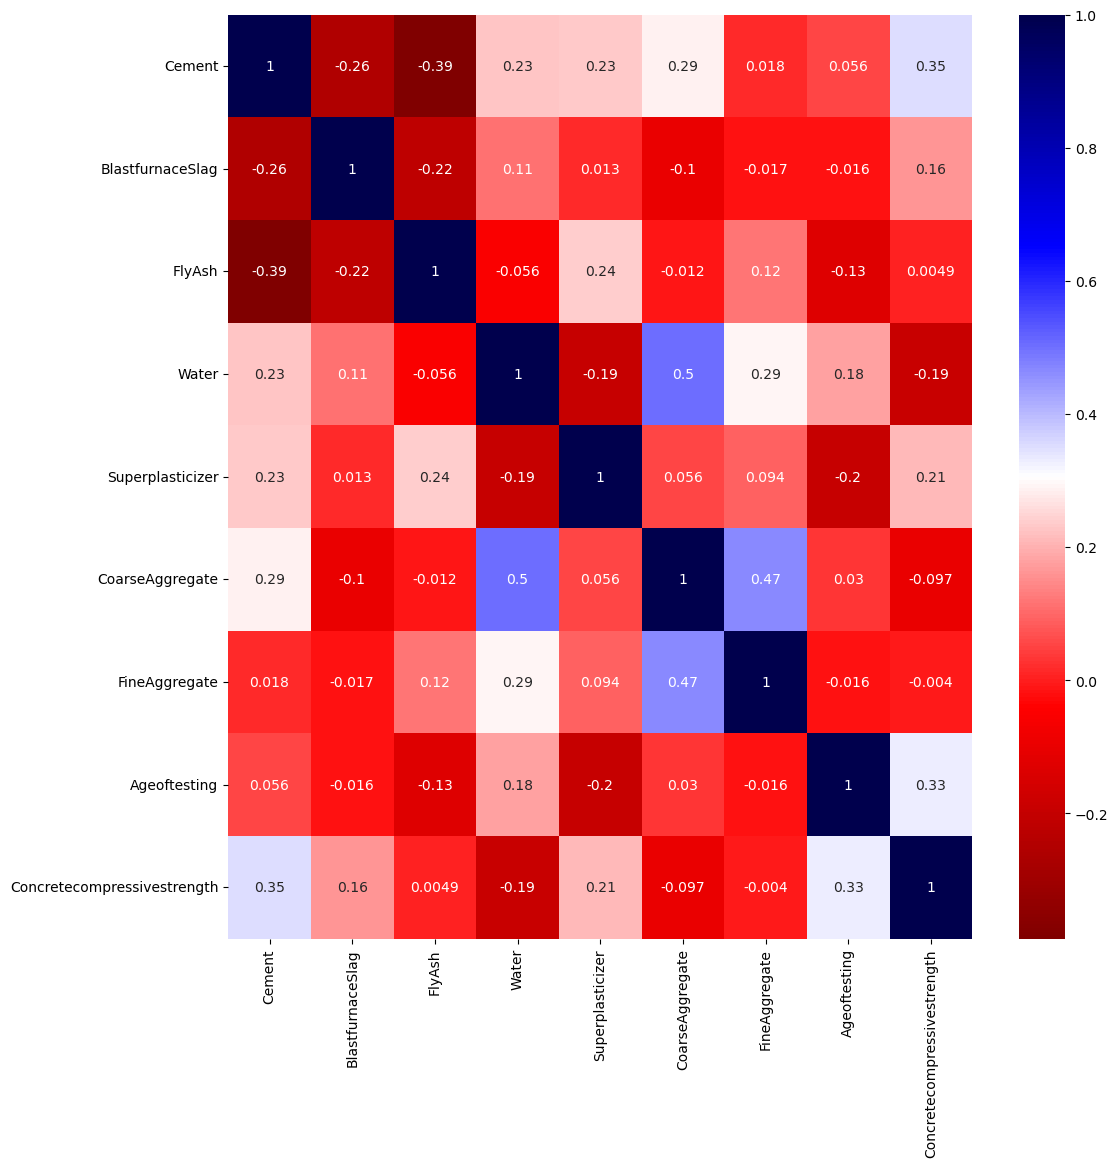

In [71]:
plt.figure(figsize=(12, 12))
sns.heatmap(dados.corr(), annot=dados.corr(), cmap='seismic_r')
plt.show()

FIM

In [72]:
from sklearn.metrics import median_absolute_error

# y_true são os valores reais e y_pred são as previsões feitas pelo modelo
medae = median_absolute_error(y_true=y, y_pred=lr.predict(X1))

print("Median Absolute Error (MedAE):", medae)


Median Absolute Error (MedAE): 11.098828984818777


C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


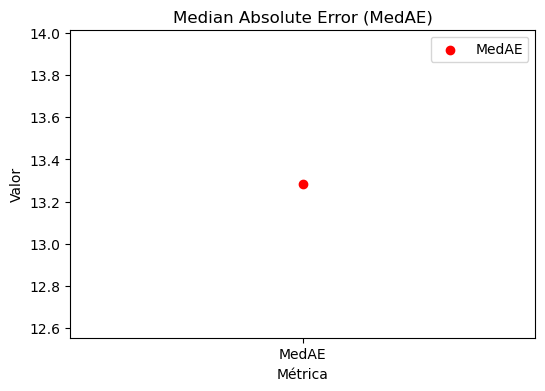

In [73]:
import matplotlib.pyplot as plt

# Valores das métricas
medae = 13.28507171279148

# Criar o gráfico de pontos
plt.figure(figsize=(6, 4))
plt.scatter(["MedAE"], [medae], color='red', label='MedAE')
plt.xlabel('Métrica')
plt.ylabel('Valor')
plt.title('Median Absolute Error (MedAE)')
plt.legend()
plt.show()


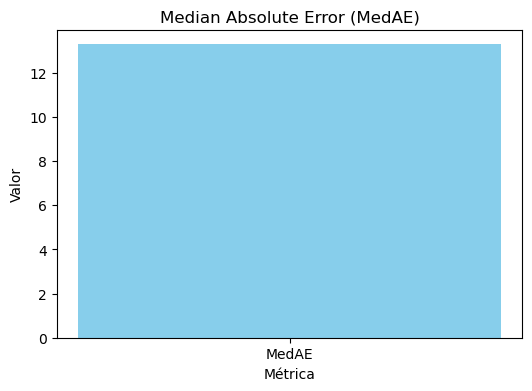

In [74]:
import matplotlib.pyplot as plt

# Valores das métricas
medae = 13.28507171279148

# Criar o gráfico de barras
plt.figure(figsize=(6, 4))
plt.bar(["MedAE"], [medae], color='skyblue')
plt.xlabel('Métrica')
plt.ylabel('Valor')
plt.title('Median Absolute Error (MedAE)')
plt.show()


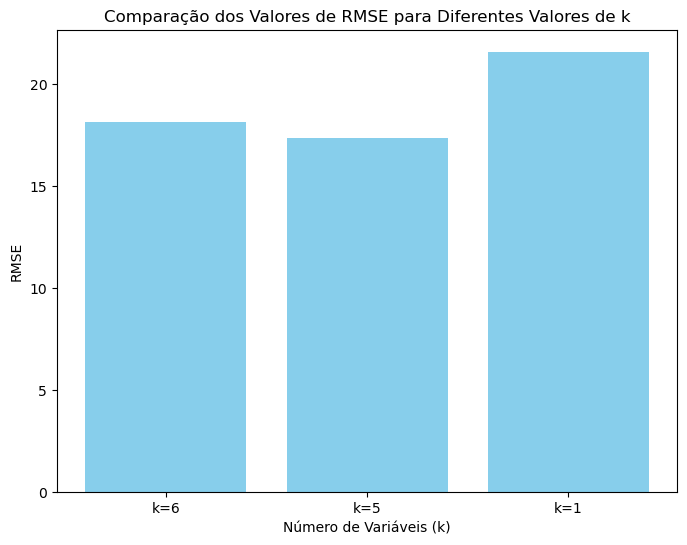

In [75]:
import matplotlib.pyplot as plt

# Valores de RMSE para diferentes valores de k
rmse_values = [18.097, 17.308, 21.558]

# Labels para cada valor de k
labels = ['k=6', 'k=5', 'k=1']

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(labels, rmse_values, color='skyblue')
plt.xlabel('Número de Variáveis (k)')
plt.ylabel('RMSE')
plt.title('Comparação dos Valores de RMSE para Diferentes Valores de k')
plt.show()


In [76]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


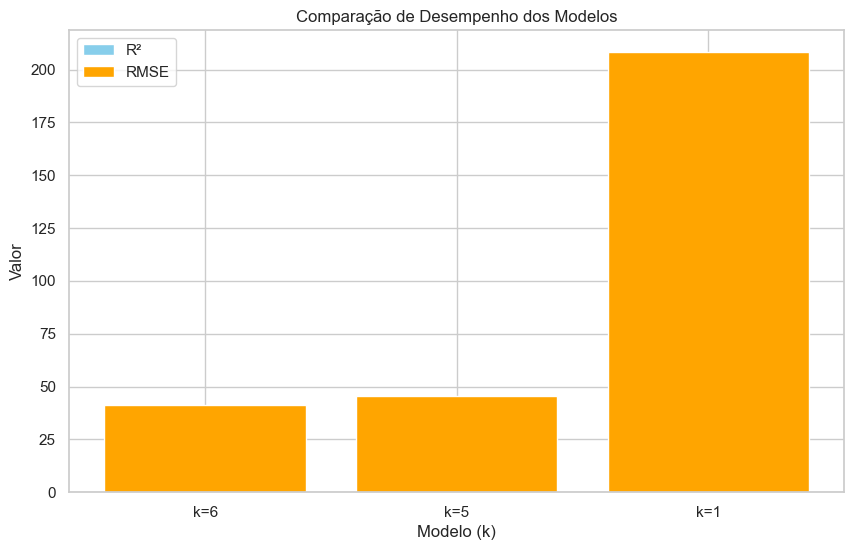

In [77]:


import matplotlib.pyplot as plt
import seaborn as sns

# Dados dos modelos
k_values = ['k=6', 'k=5', 'k=1']
r2_values = [0.82, 0.83, 0.20]
rmse_values = [41.1729, 45.3286, 208.1862]

# Definir o estilo do gráfico
sns.set(style="whitegrid")

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(k_values, r2_values, color='skyblue', label='R²')
plt.bar(k_values, rmse_values, color='orange', label='RMSE')
plt.xlabel('Modelo (k)')
plt.ylabel('Valor')
plt.title('Comparação de Desempenho dos Modelos')
plt.legend()
plt.show()


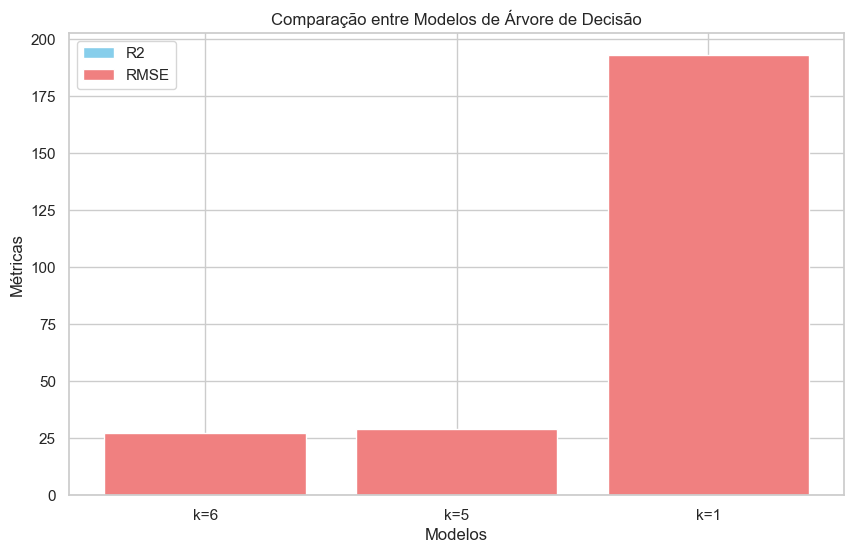

In [78]:
import matplotlib.pyplot as plt

# Dados dos modelos
modelos = ['k=6', 'k=5', 'k=1']
r2 = [0.90, 0.89, 0.28]
rmse = [27.2385, 29.2723, 192.9609]

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(modelos, r2, color='skyblue', label='R2')
plt.bar(modelos, rmse, color='lightcoral', label='RMSE')
plt.xlabel('Modelos')
plt.ylabel('Métricas')
plt.title('Comparação entre Modelos de Árvore de Decisão')
plt.legend()
plt.show()


MODELO DE REDE NEURAL ARTIFICIAL

In [79]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Carregue os dados da planilha do Excel
planilha = pd.read_excel('dataset.xlsx')  

# Divida os dados em variáveis preditoras (X) e variável de saída (y)
X = planilha[['Cement', 'BlastfurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer', 'CoarseAggregate', 'FineAggregate', 'Ageoftesting']]
y = planilha['Concretecompressivestrength']

# Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Agora você tem X_train, X_test, y_train e y_test prontos para treinar e avaliar seu modelo de RNA.


In [81]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
##X, y = make_regression(n_samples=200, random_state=1)
##X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                  ##  random_state=1)
regr = MLPRegressor(solver = 'adam', hidden_layer_sizes = (32, 64,32, ), n_iter_no_change = 200, random_state=1, max_iter=5000, learning_rate_init=0.0001, verbose = True).fit(X_train, y_train)



Iteration 1, loss = 6689.84071923
Iteration 2, loss = 5172.35980135
Iteration 3, loss = 3869.74206089
Iteration 4, loss = 2801.92788107
Iteration 5, loss = 1975.05440047
Iteration 6, loss = 1364.28036702
Iteration 7, loss = 930.88138345
Iteration 8, loss = 643.29705043
Iteration 9, loss = 460.25461290
Iteration 10, loss = 351.82837190
Iteration 11, loss = 293.72148550
Iteration 12, loss = 266.62156610
Iteration 13, loss = 252.54523582
Iteration 14, loss = 246.77722489
Iteration 15, loss = 242.00034215
Iteration 16, loss = 237.07223997
Iteration 17, loss = 231.65873263
Iteration 18, loss = 225.60655718
Iteration 19, loss = 219.74479337
Iteration 20, loss = 214.17341887
Iteration 21, loss = 209.20340867
Iteration 22, loss = 204.66509419
Iteration 23, loss = 200.51987347
Iteration 24, loss = 196.46854759
Iteration 25, loss = 192.57733130
Iteration 26, loss = 188.66791780
Iteration 27, loss = 184.81977607
Iteration 28, loss = 181.43449516
Iteration 29, loss = 177.73059857
Iteration 30, los

Iteration 254, loss = 38.15532423
Iteration 255, loss = 38.16370444
Iteration 256, loss = 38.16060691
Iteration 257, loss = 38.08516715
Iteration 258, loss = 37.98166527
Iteration 259, loss = 37.92886520
Iteration 260, loss = 37.88277369
Iteration 261, loss = 37.83421241
Iteration 262, loss = 37.82382500
Iteration 263, loss = 37.75706909
Iteration 264, loss = 37.72190591
Iteration 265, loss = 37.66340451
Iteration 266, loss = 37.62797138
Iteration 267, loss = 37.58201760
Iteration 268, loss = 37.54690133
Iteration 269, loss = 37.53506378
Iteration 270, loss = 37.46350311
Iteration 271, loss = 37.43458046
Iteration 272, loss = 37.39968028
Iteration 273, loss = 37.35471951
Iteration 274, loss = 37.33763438
Iteration 275, loss = 37.30050669
Iteration 276, loss = 37.21263356
Iteration 277, loss = 37.10644912
Iteration 278, loss = 37.04230686
Iteration 279, loss = 37.04136068
Iteration 280, loss = 36.95890998
Iteration 281, loss = 36.98320835
Iteration 282, loss = 36.81576373
Iteration 283,

Iteration 503, loss = 28.93732817
Iteration 504, loss = 28.91679772
Iteration 505, loss = 28.89939611
Iteration 506, loss = 28.87323570
Iteration 507, loss = 28.80453814
Iteration 508, loss = 28.75461760
Iteration 509, loss = 28.71886979
Iteration 510, loss = 28.67858001
Iteration 511, loss = 28.66078574
Iteration 512, loss = 28.72204492
Iteration 513, loss = 28.56221643
Iteration 514, loss = 28.68471223
Iteration 515, loss = 28.82355829
Iteration 516, loss = 28.63003885
Iteration 517, loss = 28.54252135
Iteration 518, loss = 28.41541788
Iteration 519, loss = 28.46708781
Iteration 520, loss = 28.42312583
Iteration 521, loss = 28.34115101
Iteration 522, loss = 28.28180808
Iteration 523, loss = 28.28257503
Iteration 524, loss = 28.26114378
Iteration 525, loss = 28.19808176
Iteration 526, loss = 28.14598820
Iteration 527, loss = 28.15078758
Iteration 528, loss = 28.09661482
Iteration 529, loss = 28.07867073
Iteration 530, loss = 28.01617637
Iteration 531, loss = 28.00916364
Iteration 532,

Iteration 749, loss = 22.42487573
Iteration 750, loss = 22.39043367
Iteration 751, loss = 22.38501576
Iteration 752, loss = 22.33828557
Iteration 753, loss = 22.40713608
Iteration 754, loss = 22.34240099
Iteration 755, loss = 22.29250022
Iteration 756, loss = 22.30662260
Iteration 757, loss = 22.25985974
Iteration 758, loss = 22.24519437
Iteration 759, loss = 22.24928776
Iteration 760, loss = 22.18330447
Iteration 761, loss = 22.11570166
Iteration 762, loss = 22.19172982
Iteration 763, loss = 22.16431707
Iteration 764, loss = 22.08921605
Iteration 765, loss = 22.08095163
Iteration 766, loss = 22.03693092
Iteration 767, loss = 22.07431022
Iteration 768, loss = 22.00252362
Iteration 769, loss = 22.17296364
Iteration 770, loss = 22.14279146
Iteration 771, loss = 22.16482891
Iteration 772, loss = 21.94970599
Iteration 773, loss = 22.05640770
Iteration 774, loss = 21.89551226
Iteration 775, loss = 22.00659221
Iteration 776, loss = 21.86668457
Iteration 777, loss = 21.93510552
Iteration 778,

Iteration 998, loss = 18.13755472
Iteration 999, loss = 18.12093651
Iteration 1000, loss = 18.42756307
Iteration 1001, loss = 18.86713830
Iteration 1002, loss = 19.66566929
Iteration 1003, loss = 18.87255233
Iteration 1004, loss = 18.22378417
Iteration 1005, loss = 18.03423731
Iteration 1006, loss = 18.09142816
Iteration 1007, loss = 18.34379679
Iteration 1008, loss = 18.75570102
Iteration 1009, loss = 18.23767517
Iteration 1010, loss = 18.33659019
Iteration 1011, loss = 18.48102460
Iteration 1012, loss = 18.25746849
Iteration 1013, loss = 18.51660301
Iteration 1014, loss = 18.07297586
Iteration 1015, loss = 17.91053222
Iteration 1016, loss = 17.91840117
Iteration 1017, loss = 17.84383685
Iteration 1018, loss = 17.89644815
Iteration 1019, loss = 17.85191380
Iteration 1020, loss = 18.07988512
Iteration 1021, loss = 17.87601852
Iteration 1022, loss = 17.75331262
Iteration 1023, loss = 17.79810319
Iteration 1024, loss = 17.87563212
Iteration 1025, loss = 17.86190731
Iteration 1026, loss =

Iteration 1240, loss = 15.88114182
Iteration 1241, loss = 16.03091604
Iteration 1242, loss = 15.60995705
Iteration 1243, loss = 15.60777544
Iteration 1244, loss = 15.37356401
Iteration 1245, loss = 15.36798205
Iteration 1246, loss = 15.31071808
Iteration 1247, loss = 15.37962003
Iteration 1248, loss = 15.28626058
Iteration 1249, loss = 15.36687854
Iteration 1250, loss = 15.29077081
Iteration 1251, loss = 15.33906770
Iteration 1252, loss = 15.46459758
Iteration 1253, loss = 15.34460701
Iteration 1254, loss = 15.48738598
Iteration 1255, loss = 15.31722305
Iteration 1256, loss = 15.28669444
Iteration 1257, loss = 15.35817286
Iteration 1258, loss = 15.65949819
Iteration 1259, loss = 15.38623678
Iteration 1260, loss = 15.36740365
Iteration 1261, loss = 15.35888191
Iteration 1262, loss = 15.23159534
Iteration 1263, loss = 15.36399080
Iteration 1264, loss = 15.47606199
Iteration 1265, loss = 15.21326048
Iteration 1266, loss = 15.12237912
Iteration 1267, loss = 15.17058650
Iteration 1268, loss

Iteration 1485, loss = 13.45134095
Iteration 1486, loss = 13.44799275
Iteration 1487, loss = 13.52349877
Iteration 1488, loss = 13.82914026
Iteration 1489, loss = 13.52772943
Iteration 1490, loss = 13.59535233
Iteration 1491, loss = 13.40990307
Iteration 1492, loss = 13.26082745
Iteration 1493, loss = 13.57064226
Iteration 1494, loss = 13.15367287
Iteration 1495, loss = 13.33944508
Iteration 1496, loss = 13.23473340
Iteration 1497, loss = 13.22819571
Iteration 1498, loss = 13.47534449
Iteration 1499, loss = 13.27981158
Iteration 1500, loss = 13.06670627
Iteration 1501, loss = 13.16748441
Iteration 1502, loss = 13.26936641
Iteration 1503, loss = 13.32321408
Iteration 1504, loss = 13.29752261
Iteration 1505, loss = 13.19832849
Iteration 1506, loss = 13.02304886
Iteration 1507, loss = 13.20493232
Iteration 1508, loss = 13.21986992
Iteration 1509, loss = 13.16479646
Iteration 1510, loss = 13.11311402
Iteration 1511, loss = 13.13585854
Iteration 1512, loss = 13.09607324
Iteration 1513, loss

Iteration 1727, loss = 11.93166602
Iteration 1728, loss = 11.93800132
Iteration 1729, loss = 12.01347671
Iteration 1730, loss = 12.02631969
Iteration 1731, loss = 12.07165056
Iteration 1732, loss = 12.03269620
Iteration 1733, loss = 12.15181014
Iteration 1734, loss = 12.19876505
Iteration 1735, loss = 12.75477366
Iteration 1736, loss = 12.09668619
Iteration 1737, loss = 12.04133033
Iteration 1738, loss = 12.18232715
Iteration 1739, loss = 12.10548552
Iteration 1740, loss = 12.52494598
Iteration 1741, loss = 12.30582935
Iteration 1742, loss = 12.26083459
Iteration 1743, loss = 12.14729844
Iteration 1744, loss = 12.01243383
Iteration 1745, loss = 11.89769471
Iteration 1746, loss = 11.94156979
Iteration 1747, loss = 11.86396852
Iteration 1748, loss = 12.21832576
Iteration 1749, loss = 11.97887084
Iteration 1750, loss = 11.91091829
Iteration 1751, loss = 12.23413762
Iteration 1752, loss = 12.20986213
Iteration 1753, loss = 12.03838310
Iteration 1754, loss = 11.85391216
Iteration 1755, loss

Iteration 1975, loss = 11.33254617
Iteration 1976, loss = 11.51450434
Iteration 1977, loss = 11.69696755
Iteration 1978, loss = 11.35057439
Iteration 1979, loss = 11.25659637
Iteration 1980, loss = 11.36303769
Iteration 1981, loss = 11.30994117
Iteration 1982, loss = 11.28894804
Iteration 1983, loss = 11.21973434
Iteration 1984, loss = 11.21098214
Iteration 1985, loss = 11.22963931
Iteration 1986, loss = 11.23980465
Iteration 1987, loss = 11.21133257
Iteration 1988, loss = 11.31903089
Iteration 1989, loss = 11.37863370
Iteration 1990, loss = 11.44763102
Iteration 1991, loss = 11.77057689
Iteration 1992, loss = 11.48750573
Iteration 1993, loss = 11.48066650
Iteration 1994, loss = 11.79135079
Iteration 1995, loss = 11.38115167
Iteration 1996, loss = 11.40325680
Iteration 1997, loss = 11.54759433
Iteration 1998, loss = 11.75230972
Iteration 1999, loss = 11.43223260
Iteration 2000, loss = 11.24879093
Iteration 2001, loss = 11.24540421
Iteration 2002, loss = 11.18009688
Iteration 2003, loss

Iteration 2221, loss = 10.95136491
Iteration 2222, loss = 10.72930939
Iteration 2223, loss = 10.85236227
Iteration 2224, loss = 10.76914714
Iteration 2225, loss = 10.92530361
Iteration 2226, loss = 11.01101484
Iteration 2227, loss = 10.82163873
Iteration 2228, loss = 10.84525225
Iteration 2229, loss = 10.84969390
Iteration 2230, loss = 11.17439184
Iteration 2231, loss = 11.04738583
Iteration 2232, loss = 11.04415464
Iteration 2233, loss = 11.54423699
Iteration 2234, loss = 11.50019195
Iteration 2235, loss = 10.80029406
Iteration 2236, loss = 10.81137993
Iteration 2237, loss = 10.87661046
Iteration 2238, loss = 10.92472798
Iteration 2239, loss = 10.90546891
Iteration 2240, loss = 10.71309252
Iteration 2241, loss = 10.76918907
Iteration 2242, loss = 10.87873067
Iteration 2243, loss = 11.30212080
Iteration 2244, loss = 11.04330310
Iteration 2245, loss = 10.95170914
Iteration 2246, loss = 11.24523181
Iteration 2247, loss = 10.77502221
Iteration 2248, loss = 10.83561758
Iteration 2249, loss

Iteration 2463, loss = 10.37078359
Iteration 2464, loss = 10.50575444
Iteration 2465, loss = 10.37408137
Iteration 2466, loss = 10.38991271
Iteration 2467, loss = 10.36795705
Iteration 2468, loss = 10.36232141
Iteration 2469, loss = 10.52195133
Iteration 2470, loss = 10.38717587
Iteration 2471, loss = 10.45879749
Iteration 2472, loss = 10.43624256
Iteration 2473, loss = 10.41534188
Iteration 2474, loss = 10.41049364
Iteration 2475, loss = 10.47610082
Iteration 2476, loss = 10.38963735
Iteration 2477, loss = 10.45177552
Iteration 2478, loss = 10.46549022
Iteration 2479, loss = 10.62230124
Iteration 2480, loss = 10.50967832
Iteration 2481, loss = 10.35987660
Iteration 2482, loss = 10.37346017
Iteration 2483, loss = 10.46506478
Iteration 2484, loss = 10.31737565
Iteration 2485, loss = 10.62144177
Iteration 2486, loss = 10.44984505
Iteration 2487, loss = 10.56121431
Iteration 2488, loss = 10.87944279
Iteration 2489, loss = 10.28515128
Iteration 2490, loss = 10.36890561
Iteration 2491, loss

Iteration 2706, loss = 10.04789955
Iteration 2707, loss = 10.00914346
Iteration 2708, loss = 10.21753430
Iteration 2709, loss = 10.09747194
Iteration 2710, loss = 10.05876348
Iteration 2711, loss = 10.01083453
Iteration 2712, loss = 10.03293948
Iteration 2713, loss = 10.03957245
Iteration 2714, loss = 10.22773348
Iteration 2715, loss = 10.12215375
Iteration 2716, loss = 10.23196672
Iteration 2717, loss = 10.38254029
Iteration 2718, loss = 10.05415972
Iteration 2719, loss = 10.03285207
Iteration 2720, loss = 10.02814573
Iteration 2721, loss = 10.25994199
Iteration 2722, loss = 10.19282615
Iteration 2723, loss = 10.20577730
Iteration 2724, loss = 10.27670579
Iteration 2725, loss = 10.24730436
Iteration 2726, loss = 11.02671088
Iteration 2727, loss = 10.28576382
Iteration 2728, loss = 9.97888608
Iteration 2729, loss = 10.14294392
Iteration 2730, loss = 10.07233436
Iteration 2731, loss = 10.17341876
Iteration 2732, loss = 10.03527602
Iteration 2733, loss = 10.09586321
Iteration 2734, loss 

Iteration 2963, loss = 9.86047737
Iteration 2964, loss = 9.78414936
Iteration 2965, loss = 9.72706164
Iteration 2966, loss = 9.76531208
Iteration 2967, loss = 9.90058186
Iteration 2968, loss = 10.06074991
Iteration 2969, loss = 10.25184855
Iteration 2970, loss = 10.44972670
Iteration 2971, loss = 10.50267297
Iteration 2972, loss = 10.09175712
Iteration 2973, loss = 9.89296884
Iteration 2974, loss = 9.91034517
Iteration 2975, loss = 9.68739002
Iteration 2976, loss = 9.79655384
Iteration 2977, loss = 9.95080693
Iteration 2978, loss = 9.70606011
Iteration 2979, loss = 9.75566788
Iteration 2980, loss = 9.83238991
Iteration 2981, loss = 9.86094352
Iteration 2982, loss = 10.27878929
Iteration 2983, loss = 9.88406276
Iteration 2984, loss = 9.69944740
Iteration 2985, loss = 10.32705359
Iteration 2986, loss = 10.12757206
Iteration 2987, loss = 10.11369173
Iteration 2988, loss = 9.85353095
Iteration 2989, loss = 9.91986963
Iteration 2990, loss = 9.78354673
Iteration 2991, loss = 9.74275089
Itera

Iteration 3205, loss = 9.48300426
Iteration 3206, loss = 9.51157525
Iteration 3207, loss = 9.64191563
Iteration 3208, loss = 9.60832621
Iteration 3209, loss = 9.67208947
Iteration 3210, loss = 9.55375115
Iteration 3211, loss = 9.50941249
Iteration 3212, loss = 9.80551222
Iteration 3213, loss = 9.55508961
Iteration 3214, loss = 9.72345221
Iteration 3215, loss = 9.81465067
Iteration 3216, loss = 9.66756464
Iteration 3217, loss = 9.54580078
Iteration 3218, loss = 9.49511598
Iteration 3219, loss = 9.50581182
Iteration 3220, loss = 9.60015763
Iteration 3221, loss = 9.61748578
Iteration 3222, loss = 9.47363666
Iteration 3223, loss = 9.56343635
Iteration 3224, loss = 9.52325169
Iteration 3225, loss = 9.56331680
Iteration 3226, loss = 9.56880611
Iteration 3227, loss = 9.67870069
Iteration 3228, loss = 9.47988813
Iteration 3229, loss = 9.66343751
Iteration 3230, loss = 9.65931491
Iteration 3231, loss = 9.75706626
Iteration 3232, loss = 9.55202437
Iteration 3233, loss = 9.53516527
Iteration 3234

Iteration 3464, loss = 9.27482500
Iteration 3465, loss = 9.24026823
Iteration 3466, loss = 9.34789472
Iteration 3467, loss = 9.29931104
Iteration 3468, loss = 9.35073641
Iteration 3469, loss = 9.29072442
Iteration 3470, loss = 9.29756542
Iteration 3471, loss = 9.26808914
Iteration 3472, loss = 9.64957936
Iteration 3473, loss = 9.44456979
Iteration 3474, loss = 9.56658132
Iteration 3475, loss = 9.27489258
Iteration 3476, loss = 9.25993621
Iteration 3477, loss = 9.26849873
Iteration 3478, loss = 9.30310306
Iteration 3479, loss = 9.30532589
Iteration 3480, loss = 9.28715915
Iteration 3481, loss = 9.44959317
Iteration 3482, loss = 9.31325715
Iteration 3483, loss = 9.35228407
Iteration 3484, loss = 9.54899108
Iteration 3485, loss = 9.24941192
Iteration 3486, loss = 9.34633688
Iteration 3487, loss = 9.36773431
Iteration 3488, loss = 9.49027181
Iteration 3489, loss = 9.79089139
Iteration 3490, loss = 9.51775798
Iteration 3491, loss = 9.72739716
Iteration 3492, loss = 9.68530635
Iteration 3493

Iteration 3707, loss = 9.44240597
Iteration 3708, loss = 9.30616360
Iteration 3709, loss = 9.15470607
Iteration 3710, loss = 9.16074740
Iteration 3711, loss = 9.13976777
Iteration 3712, loss = 9.10745983
Iteration 3713, loss = 9.09843166
Iteration 3714, loss = 9.10368716
Iteration 3715, loss = 9.20974701
Iteration 3716, loss = 9.16716097
Iteration 3717, loss = 9.16862375
Iteration 3718, loss = 9.13748981
Iteration 3719, loss = 9.27897953
Iteration 3720, loss = 9.17393637
Iteration 3721, loss = 9.20721036
Iteration 3722, loss = 9.21116212
Iteration 3723, loss = 9.09064869
Iteration 3724, loss = 9.19271266
Iteration 3725, loss = 9.26256687
Iteration 3726, loss = 9.10517819
Iteration 3727, loss = 9.21609139
Iteration 3728, loss = 9.45002695
Iteration 3729, loss = 9.24802102
Iteration 3730, loss = 9.25535884
Iteration 3731, loss = 9.11204000
Iteration 3732, loss = 9.24339717
Iteration 3733, loss = 9.20537951
Iteration 3734, loss = 9.23949536
Iteration 3735, loss = 9.22287390
Iteration 3736

Iteration 3959, loss = 8.99811969
Iteration 3960, loss = 8.93340472
Iteration 3961, loss = 9.02635683
Iteration 3962, loss = 8.99411774
Iteration 3963, loss = 9.51322936
Iteration 3964, loss = 9.03119048
Iteration 3965, loss = 9.11897334
Iteration 3966, loss = 9.10006401
Iteration 3967, loss = 9.10621968
Iteration 3968, loss = 9.02561545
Iteration 3969, loss = 9.02454752
Iteration 3970, loss = 9.20032037
Iteration 3971, loss = 9.04862525
Iteration 3972, loss = 8.93082971
Iteration 3973, loss = 9.10323380
Iteration 3974, loss = 9.20348808
Iteration 3975, loss = 9.03899871
Iteration 3976, loss = 8.99439930
Iteration 3977, loss = 9.03533501
Iteration 3978, loss = 9.04333255
Iteration 3979, loss = 9.39884655
Iteration 3980, loss = 9.36433241
Iteration 3981, loss = 9.52968193
Iteration 3982, loss = 9.15164650
Iteration 3983, loss = 9.15968220
Iteration 3984, loss = 9.02699524
Iteration 3985, loss = 9.01819475
Iteration 3986, loss = 8.90504791
Iteration 3987, loss = 9.10149856
Iteration 3988

Iteration 4214, loss = 8.94130652
Iteration 4215, loss = 8.85131861
Iteration 4216, loss = 8.88187739
Iteration 4217, loss = 9.28699060
Iteration 4218, loss = 9.28141383
Iteration 4219, loss = 9.45546676
Iteration 4220, loss = 9.08475870
Iteration 4221, loss = 8.94977515
Iteration 4222, loss = 9.14522370
Iteration 4223, loss = 8.95485956
Iteration 4224, loss = 8.81405682
Iteration 4225, loss = 8.88053265
Iteration 4226, loss = 8.89953098
Iteration 4227, loss = 8.85501672
Iteration 4228, loss = 8.87784990
Iteration 4229, loss = 8.91942903
Iteration 4230, loss = 8.93608196
Iteration 4231, loss = 9.02806799
Iteration 4232, loss = 8.82153472
Iteration 4233, loss = 8.80060213
Iteration 4234, loss = 8.84298060
Iteration 4235, loss = 8.91348173
Iteration 4236, loss = 8.85774636
Iteration 4237, loss = 9.13163837
Iteration 4238, loss = 9.29179117
Iteration 4239, loss = 9.03446428
Iteration 4240, loss = 9.01760631
Iteration 4241, loss = 9.06232519
Iteration 4242, loss = 8.89020916
Iteration 4243

Iteration 4460, loss = 8.90981552
Iteration 4461, loss = 8.93141222
Iteration 4462, loss = 8.92529055
Iteration 4463, loss = 8.75299821
Iteration 4464, loss = 8.72647240
Iteration 4465, loss = 9.01829217
Iteration 4466, loss = 8.88336158
Iteration 4467, loss = 9.11062861
Iteration 4468, loss = 8.69730006
Iteration 4469, loss = 8.73849904
Iteration 4470, loss = 8.99770016
Iteration 4471, loss = 8.78117181
Iteration 4472, loss = 8.71762925
Iteration 4473, loss = 8.75402213
Iteration 4474, loss = 8.70882990
Iteration 4475, loss = 8.87122425
Iteration 4476, loss = 8.63845799
Iteration 4477, loss = 8.69481273
Iteration 4478, loss = 8.80717904
Iteration 4479, loss = 8.72036644
Iteration 4480, loss = 8.66434220
Iteration 4481, loss = 8.68274290
Iteration 4482, loss = 8.70567310
Iteration 4483, loss = 8.71300223
Iteration 4484, loss = 8.70941547
Iteration 4485, loss = 8.70800409
Iteration 4486, loss = 9.00744390
Iteration 4487, loss = 8.71835589
Iteration 4488, loss = 8.61031062
Iteration 4489

Iteration 4712, loss = 8.51657706
Iteration 4713, loss = 8.49560406
Iteration 4714, loss = 8.48729460
Iteration 4715, loss = 8.55525829
Iteration 4716, loss = 8.59247904
Iteration 4717, loss = 8.68339468
Iteration 4718, loss = 8.85215549
Iteration 4719, loss = 8.88233383
Iteration 4720, loss = 8.70375714
Iteration 4721, loss = 8.93757533
Iteration 4722, loss = 8.75856762
Iteration 4723, loss = 8.58726297
Iteration 4724, loss = 8.84563042
Iteration 4725, loss = 8.64218010
Iteration 4726, loss = 8.61339012
Iteration 4727, loss = 8.52713325
Iteration 4728, loss = 8.59111539
Iteration 4729, loss = 8.59889600
Iteration 4730, loss = 8.80634068
Iteration 4731, loss = 8.63833345
Iteration 4732, loss = 9.02759414
Iteration 4733, loss = 8.78099907
Iteration 4734, loss = 8.66479660
Iteration 4735, loss = 8.52182082
Iteration 4736, loss = 8.48244077
Iteration 4737, loss = 8.58102923
Iteration 4738, loss = 8.72266709
Iteration 4739, loss = 8.75071131
Iteration 4740, loss = 8.56666384
Iteration 4741

Iteration 4980, loss = 8.47573759
Iteration 4981, loss = 8.49451959
Iteration 4982, loss = 8.42888139
Iteration 4983, loss = 8.39779426
Iteration 4984, loss = 8.43186168
Iteration 4985, loss = 8.46742294
Iteration 4986, loss = 8.45249466
Iteration 4987, loss = 8.36617897
Iteration 4988, loss = 8.36933378
Iteration 4989, loss = 8.39717511
Iteration 4990, loss = 8.58715563
Iteration 4991, loss = 8.48469770
Iteration 4992, loss = 8.71420965
Iteration 4993, loss = 8.74210940
Iteration 4994, loss = 8.48953493
Iteration 4995, loss = 8.73691279
Iteration 4996, loss = 8.50435984
Iteration 4997, loss = 8.53662538
Iteration 4998, loss = 8.42411606
Iteration 4999, loss = 8.51045073
Iteration 5000, loss = 8.41876431


C:\Users\ARTHUR\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [82]:
y_pred = regr.predict(X_test)
regr.score(X_train, y_train)

0.9359636916489794

In [83]:
y_pred

array([34.19699311, 18.69884654, 17.2335835 , 20.6006207 , 39.31970266,
       20.65576541, 34.55396823, 43.16375628, 53.73735912, 31.31239043,
       25.32278231, 27.44259777, 13.69233179, 38.29439528, 28.82960289,
       43.14755755, 41.16018838, 21.1697497 , 39.16429233, 36.71790152,
       40.6760418 , 13.03628841, 20.37831775, 70.48354598, 17.93067282,
       37.65579669, 48.41224248, 44.99940865, 38.05553177, 11.21701168,
       36.08594497, 84.36628138, 17.78560302, 17.34440966, 57.23975288,
       53.19756778, 31.62937064, 45.61077444, 27.53250025, 38.02769804,
       30.56404747, 25.64866546, 19.0873489 , 15.55698781, 40.6760418 ,
       53.46973045, 21.19211546, 54.27705889, 35.53665154, 13.55351658,
       34.96539506, 23.72786607, 19.70266611, 18.79479915,  5.33606214,
       17.53240357, 49.28816156, 43.49668163, 36.36378284, 60.63342974,
       28.6866772 , 21.6052208 , 64.32944642, 26.29560188, 21.31519809,
       30.55503954, 52.95874103, 29.79933298, 47.20121462, 10.91

In [84]:
regr.score(X_test, y_test)

0.8695525722374535

Ajustar a Taxa de Aprendizado (Learning Rate): A taxa de aprendizado é um hiperparâmetro crítico que controla o tamanho dos passos que o otimizador dá durante o treinamento. Às vezes, um valor de taxa de aprendizado muito alto pode causar instabilidade e impedir a convergência. Você pode ajustar a taxa de aprendizado para um valor menor.
learning_rate_init=0.01

In [85]:
import numpy as np
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_true=y_test, y_pred = y_pred))

5.7811807054930116

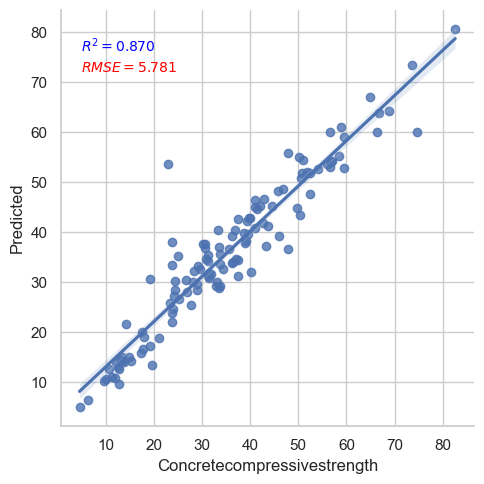

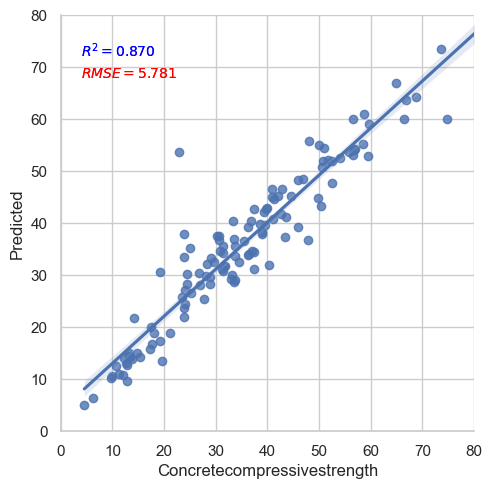

In [88]:
# Criar o gráfico de dispersão com a reta de regressão
g = sns.lmplot(x = 'Concretecompressivestrength', y = 'Predicted', data = df, ci = 90)
g.map_dataframe(annotate)
plt.show()

# Adicionar anotações ao gráfico
def annotate(*args, **kwargs):
    r_squared_text = f'$R^2 = {r_squared:.3f}$'
    rmse_text = f'$RMSE = {rmse:.3f}$'
    plt.gca().annotate(r_squared_text, xy=(0.05, 0.9), xycoords='axes fraction', fontsize=10, color='blue')
    plt.gca().annotate(rmse_text, xy=(0.05, 0.85), xycoords='axes fraction', fontsize=10, color='red')

g.map_dataframe(annotate)

# Ajustar os limites dos eixos x e y
plt.xlim(0, 80)
plt.ylim(0, 80)

# Exibir o gráfico
plt.show()